<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/3_LinearRegression/3_Regression_TensorFlowWay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step #25 A = [[2.477031]] b = [[2.4366367]]
Loss = 1.8492628
Step #50 A = [[1.7654641]] b = [[3.3745375]]
Loss = 0.745481
Step #75 A = [[1.3777704]] b = [[3.9459186]]
Loss = 0.509291
Step #100 A = [[1.2542187]] b = [[4.3102436]]
Loss = 0.257666


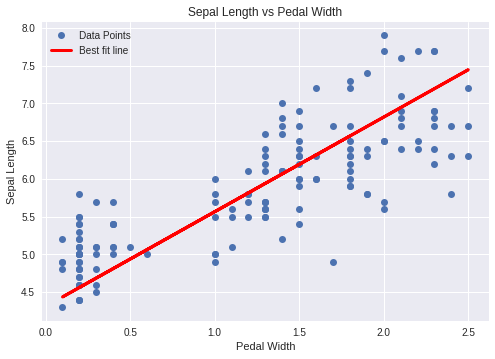

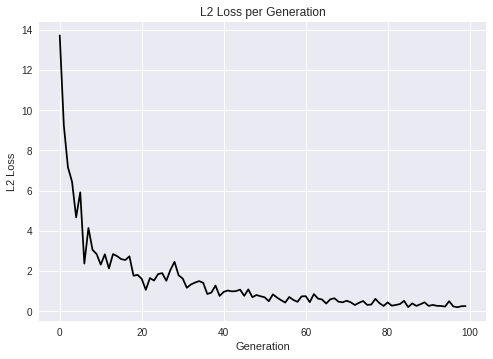

In [10]:
# 3. TensorFlow way of Linear Regression

# Load necessary libraries, creating a graph and loading the data
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Declare learning rate, batch size, placeholders and model variables
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Formula for linear model, y = Ax + b
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare L2 Loss function, initialize variables, declare optimizer
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)


# Train the model
loss_vec = []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
  temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec.append(temp_loss)
  if (i+1)%25 == 0:
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss = ' + str(temp_loss))


# Extract coefficients and create best fit
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
  best_fit.append(slope*i + y_intercept)
                      
    
# Plot the line
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()